In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df1 = pd.read_csv ("QVI_purchase_behaviour.csv")

In [4]:
df2 = pd.read_csv ("QVI_transaction_data.csv")

In [5]:
df1.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
df2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,5/14/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,5/20/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,8/17/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,8/18/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [8]:
df2.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [9]:
df2.loc[df2["PROD_QTY"]==200] #not normal qty 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,8/19/2018,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,5/20/2019,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [10]:
df2.isna().sum() # no nulls in the dataset

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [11]:
df2.duplicated() #no duplicated values

0         False
1         False
2         False
3         False
4         False
          ...  
264831    False
264832    False
264833    False
264834    False
264835    False
Length: 264836, dtype: bool

In [12]:
df2["DATE"]=pd.to_datetime(df2["DATE"]) #changing data column type

In [13]:
df2["DATE"]

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [14]:
df3=df2.merge(df1, how ="inner",on = ["LYLTY_CARD_NBR"]) # joining the 2 datasets 
df3

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [15]:
df_subset =df3.loc[df3["PROD_NAME"].str.contains("Chips.")| df3["PROD_NAME"].str.contains("Pringles.")
                   |df3["PROD_NAME"].str.contains("Dorito Corn")]
df_subset #check for only chips products

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
10,2018-12-12,4,4074,2980,4,Dorito Corn Chp Supreme 380g,2,13.0,MIDAGE SINGLES/COUPLES,Budget
12,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget
20,2019-06-30,4,4196,3540,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264819,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,YOUNG SINGLES/COUPLES,Premium
264823,2018-07-31,272,272148,269843,34,Pringles Slt Vingar 134g,2,7.4,YOUNG SINGLES/COUPLES,Premium
264827,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,YOUNG SINGLES/COUPLES,Premium
264828,2018-07-27,272,272236,269974,68,Pringles Chicken Salt Crips 134g,2,7.4,YOUNG SINGLES/COUPLES,Premium


In [16]:
df_subset.reset_index(drop=True)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
2,2018-12-12,4,4074,2980,4,Dorito Corn Chp Supreme 380g,2,13.0,MIDAGE SINGLES/COUPLES,Budget
3,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget
4,2019-06-30,4,4196,3540,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
78052,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,YOUNG SINGLES/COUPLES,Premium
78053,2018-07-31,272,272148,269843,34,Pringles Slt Vingar 134g,2,7.4,YOUNG SINGLES/COUPLES,Premium
78054,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,YOUNG SINGLES/COUPLES,Premium
78055,2018-07-27,272,272236,269974,68,Pringles Chicken Salt Crips 134g,2,7.4,YOUNG SINGLES/COUPLES,Premium


In [17]:
df_subset[["PROD_NAME","prod_size"]]=df_subset["PROD_NAME"].str.rsplit(" ",1,expand=True)

C:\Users\ReeM Khaled\AppData\Local\Temp\ipykernel_12724\3515517610.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df_subset[["PROD_NAME","prod_size"]]=df_subset["PROD_NAME"].str.rsplit(" ",1,expand=True)
C:\Users\ReeM Khaled\AppData\Local\Temp\ipykernel_12724\3515517610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[["PROD_NAME","prod_size"]]=df_subset["PROD_NAME"].str.rsplit(" ",1,expand=True)
C:\Users\ReeM Khaled\AppData\Local\Temp\ipykernel_12724\3515517610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [18]:
df_subset #now we have more column for the size of products

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,prod_size
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160g
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g
10,2018-12-12,4,4074,2980,4,Dorito Corn Chp Supreme,2,13.0,MIDAGE SINGLES/COUPLES,Budget,380g
12,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,MIDAGE SINGLES/COUPLES,Budget,330g
20,2019-06-30,4,4196,3540,28,Thins Potato Chips Hot & Spicy,2,6.6,MIDAGE SINGLES/COUPLES,Budget,175g
...,...,...,...,...,...,...,...,...,...,...,...
264819,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips,2,7.6,YOUNG SINGLES/COUPLES,Premium,110g
264823,2018-07-31,272,272148,269843,34,Pringles Slt Vingar,2,7.4,YOUNG SINGLES/COUPLES,Premium,134g
264827,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips,2,7.6,YOUNG SINGLES/COUPLES,Premium,110g
264828,2018-07-27,272,272236,269974,68,Pringles Chicken Salt Crips,2,7.4,YOUNG SINGLES/COUPLES,Premium,134g


In [19]:
df_subset["PROD_QTY"].describe() 

count    78057.000000
mean         1.914012
std          1.058834
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        200.000000
Name: PROD_QTY, dtype: float64

In [20]:
df_subset["TOT_SALES"].describe()

count    78057.000000
mean         7.096927
std          3.929634
min          1.900000
25%          6.600000
50%          7.400000
75%          7.600000
max        650.000000
Name: TOT_SALES, dtype: float64

In [21]:
df_subset.groupby("STORE_NBR").sum().sort_values("TOT_SALES",ascending=False).head(5)
#the top 5 store by sales

C:\Users\ReeM Khaled\AppData\Local\Temp\ipykernel_12724\2226535565.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_subset.groupby("STORE_NBR").sum().sort_values("TOT_SALES",ascending=False).head(5)


,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
STORE_NBR,,,,,
226,164216098,164986270,35605,1837,7037.05
88,66111914,59025608,31634,1337,5274.75
165,106218922,106926753,30548,1280,5139.25
4,2586251,2153634,30055,1219,4861.25
237,146693105,147408761,29658,1205,4806.30


In [22]:
top_stors=df_subset.groupby("PROD_NAME").sum().sort_values("TOT_SALES",ascending=False).head(5)
top_stors
#the top 5 products by sales

C:\Users\ReeM Khaled\AppData\Local\Temp\ipykernel_12724\2566124710.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_stors=df_subset.groupby("PROD_NAME").sum().sort_values("TOT_SALES",ascending=False).head(5)


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
PROD_NAME,,,,,,
Dorito Corn Chp Supreme,439896,443492797,440171620,12740,6509,40352.0
Smiths Crinkle Chips Salt & Vinegar,429523,433054613,429685816,51152,6106,34804.2
Doritos Corn Chips Cheese Supreme,427989,430784316,428475431,96510,6180,27183.2
Doritos Corn Chips Nacho Cheese,433813,434357783,434129742,243320,6037,26562.8
Doritos Corn Chips Original,423263,423786750,423673145,146687,5961,26228.4


<Axes: title={'center': 'top5_products'}, xlabel='PROD_NAME'>

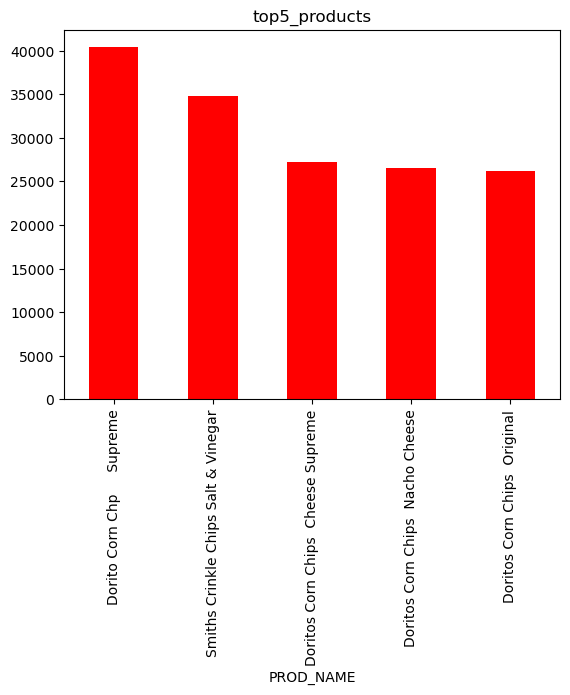

In [23]:
top_stors["TOT_SALES"].plot(kind="bar",color="red",title="top5_products")

In [24]:
life_stage =df_subset.groupby("LIFESTAGE").sum().sort_values("TOT_SALES",ascending=False)
life_stage

C:\Users\ReeM Khaled\AppData\Local\Temp\ipykernel_12724\864896804.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  life_stage =df_subset.groupby("LIFESTAGE").sum().sort_values("TOT_SALES",ascending=False)


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
LIFESTAGE,,,,,,
OLDER SINGLES/COUPLES,2182460,2189573464,2183391867,793204,31153,115996.95
RETIREES,2025542,2033584079,2026729481,729185,28282,105774.30
OLDER FAMILIES,1874017,1876123223,1874164965,666300,27403,100075.10
YOUNG FAMILIES,1700350,1703758066,1701416229,609464,24166,88516.50
YOUNG SINGLES/COUPLES,1493639,1498050396,1494343696,532127,20392,76561.60
MIDAGE SINGLES/COUPLES,1011022,1014645461,1012111142,360809,14109,52445.40
NEW FAMILIES,281868,282239617,282254379,101227,3897,14594.95


<Axes: xlabel='LIFESTAGE'>

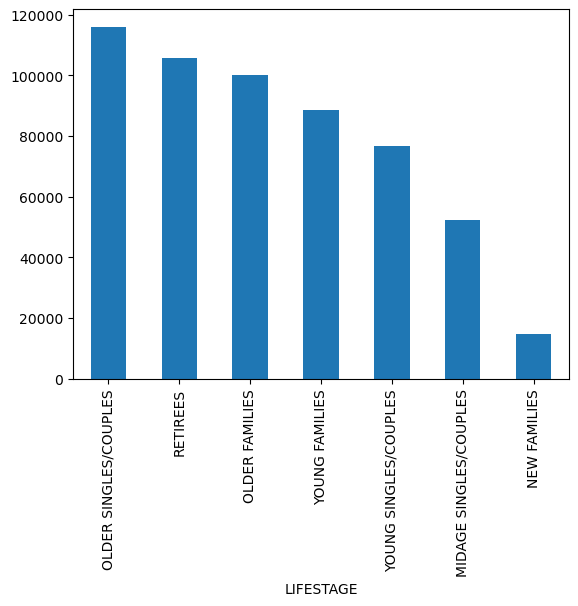

In [25]:
life_stage["TOT_SALES"].plot(kind="bar")


In [26]:
customers_seg = df_subset.groupby("PREMIUM_CUSTOMER").sum().sort_values("TOT_SALES",ascending=False)
customers_seg
#sales by customers kinds 

C:\Users\ReeM Khaled\AppData\Local\Temp\ipykernel_12724\1292846869.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customers_seg = df_subset.groupby("PREMIUM_CUSTOMER").sum().sort_values("TOT_SALES",ascending=False)


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
PREMIUM_CUSTOMER,,,,,,
Mainstream,4116086,4129585334,4118373085,1471969,57747,215860.80
Budget,3675356,3684386295,3677243538,1324703,52121,192289.35
Premium,2777456,2784002677,2778795136,995644,39534,145814.65


<Axes: title={'center': 'sales_by_cutomer_segment'}, ylabel='TOT_SALES'>

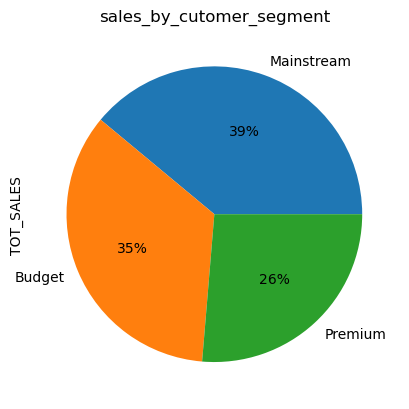

In [27]:
customers_seg["TOT_SALES"].plot(kind="pie",autopct='%1.0f%%',title = "sales_by_cutomer_segment")

In [28]:
total_sales=df_subset.groupby(pd.Grouper(key="DATE",freq="m")).sum()
total_sales

C:\Users\ReeM Khaled\AppData\Local\Temp\ipykernel_12724\807346847.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_sales=df_subset.groupby(pd.Grouper(key="DATE",freq="m")).sum()


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
DATE,,,,,,
2018-07-31,915475,916588161,916204582,325199,12880,47782.30
2018-08-31,881432,884927263,882217548,313783,12322,45474.75
2018-09-30,872259,876228384,872617005,315649,12402,46008.80
2018-10-31,900867,904246381,901516323,322991,12690,47139.90
2018-11-30,891284,892455915,891793494,318777,12573,46764.00
2018-12-31,892933,896325276,893234456,328261,12792,47372.60
2019-01-31,876099,877193312,876210511,316825,12564,46721.70
2019-02-28,810053,811391882,810797500,288411,11506,42944.50
2019-03-31,916654,917861521,917173131,332108,13012,48263.30


In [29]:
maxi=total_sales["TOT_SALES"].max()

In [30]:
total_sales.loc[total_sales["TOT_SALES"]==maxi]
# the highest month per sales

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
DATE,,,,,,
2019-03-31,916654,917861521,917173131,332108,13012,48263.3


In [31]:
mini=total_sales["TOT_SALES"].min()

In [32]:
total_sales.loc[total_sales["TOT_SALES"]==mini]
#the lowest month per sales

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
DATE,,,,,,
2019-02-28,810053,811391882,810797500,288411,11506,42944.5


<Axes: title={'center': 'sales_per_month'}, xlabel='DATE'>

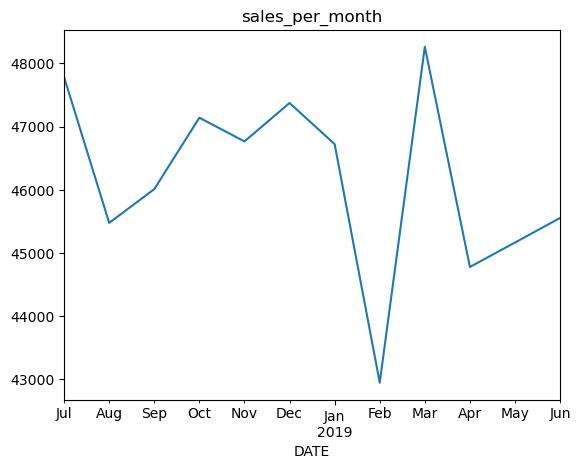

In [33]:
total_sales["TOT_SALES"].plot(kind="line",title = "sales_per_month")

In [35]:
STORS =df_subset.groupby("STORE_NBR").sum().sort_values("TOT_SALES",ascending=False)

C:\Users\ReeM Khaled\AppData\Local\Temp\ipykernel_12724\3068666902.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  STORS =df_subset.groupby("STORE_NBR").sum().sort_values("TOT_SALES",ascending=False)


In [62]:
STORS.reset_index()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,226,164216098,164986270,35605,1837,7037.05
1,88,66111914,59025608,31634,1337,5274.75
2,165,106218922,106926753,30548,1280,5139.25
3,4,2586251,2153634,30055,1219,4861.25
4,237,146693105,147408761,29658,1205,4806.30
...,...,...,...,...,...,...
261,42,549142,500762,677,14,44.10
262,117,1406334,1447954,655,12,43.00
263,252,504744,507051,94,2,7.40
264,11,22746,21015,133,2,6.70


In [74]:
STORS.query("STORE_NBR==88")

,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
STORE_NBR,,,,,
88,66111914,59025608,31634,1337,5274.75


In [68]:
STORS.query("STORE_NBR==77 ")

,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
STORE_NBR,,,,,
77,16094485,11601842,7206,237,828.1


In [65]:
STORS.query("STORE_NBR==86")

,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
STORE_NBR,,,,,
86,34210109,33745125,18539,774,2667.15
